In [482]:
import pandas as pd
import os
import numpy as np

THRESHOLD = 2
ROWS = 0
COLUMNS = 1

# depending on the OS the path to the data file is different
if os.name == 'nt':
    data = pd.read_csv(r'..\data\data-with-selected-features.csv')
elif os.name == 'posix':
    data = pd.read_csv(r'../data/data-with-selected-features.csv')

data.head()

# # depending on the OS the path to the data file is different
# if os.name == 'nt':
#     data = pd.read_excel(r'..\data\nutrient-file-release2-jan22.xlsx', sheet_name='All solids & liquids per 100g')
# elif os.name == 'posix':
#     data = pd.read_excel(r'../data/nutrient-file-release2-jan22.xlsx', sheet_name='All solids & liquids per 100g')

# # replace 0 with NaN
# data = data.replace({0: np.nan})
    
# # get the list of row/column names before dropping
# before_cols = data.columns
# before_rows = data.index

# # remove rows/columns with less than (THRESHOLD) non-null values
# data = data.dropna(thresh=THRESHOLD, axis=COLUMNS)
# data = data.dropna(thresh=THRESHOLD, axis=ROWS)

# # get the list of row/column names after dropping
# after_cols = data.columns
# after_rows = data.index

# # find the removed rows/columns
# removed_rows = [row for row in before_rows if row not in after_rows]
# removed_cols = [col for col in before_cols if col not in after_cols]

# # print the removed rows/columns
# print("Removed" , len(removed_rows), "rows")
# print("Removed" , len(removed_cols), "columns")
# print("Removed rows: ", removed_rows)
# print("Removed columns: ", removed_cols)

,Public Food Key,Classification,Food Name,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Total sugars (g),...,Niacin derived from tryptophan \n(mg),Niacin derived equivalents \n(mg),Cobalamin (B12) \n(ug),Vitamin D3 equivalents \n(ug),"Total saturated fatty acids, equated \n(g)","Total monounsaturated fatty acids, equated \n(g)",C18:2w6 (g),"Total long chain omega 3 fatty acids, equated \n(mg)",Cholesterol \n(mg),Tryptophan \n(mg)
0,F002258,31,"Cardamom seed, dried, ground",1236,1012,8.3,10.8,1.72,6.7,4.4,...,2.64,3.74,0.0,0.0,2.20,2.81,1.00,0.000,0,155
1,F002893,31,"Chilli (chili), dried, ground",1280,1002,10.8,13.4,2.14,14.3,7.2,...,1.18,12.78,0.0,0.0,2.06,2.68,6.24,0.000,0,69
2,F002963,31,"Cinnamon, dried, ground",1004,579,10.6,4.0,0.64,1.2,2.2,...,0.83,2.16,0.0,0.0,0.62,0.44,0.08,0.000,0,49
3,F002970,31,"Cloves, dried, ground",1389,1118,9.9,6.0,0.96,13.0,2.4,...,0.51,2.07,0.0,0.0,5.49,1.93,3.69,266.581,0,30
4,F003190,31,"Coriander seed, dried, ground",1344,1009,8.9,12.4,1.98,17.8,2.4,...,3.03,5.16,0.0,0.0,1.03,14.14,1.82,0.000,0,178


In [483]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# split data into train and test sets
train, test = train_test_split(data, test_size=0.2)

In [484]:
# use nutrition columns as features
X_COLS = list(data.columns[3:])

# use classification column as target
y_COL = data.columns[1]

print(f"X_COLS: {X_COLS}")
print(f"y_COL: {y_COL}")

X_COLS: ['Energy with dietary fibre, equated \n(kJ)', 'Energy, without dietary fibre, equated \n(kJ)', 'Moisture (water) \n(g)', 'Protein \n(g)', 'Nitrogen \n(g)', 'Fat, total \n(g)', 'Total sugars (g)', 'Available carbohydrate, without sugar alcohols \n(g)', 'Available carbohydrate, with sugar alcohols \n(g)', 'Iodine (I) \n(ug)', 'Phosphorus (P) \n(mg)', 'Selenium (Se) \n(ug)', 'Sodium (Na) \n(mg)', 'Zinc (Zn) \n(mg)', 'Niacin derived from tryptophan \n(mg)', 'Niacin derived equivalents \n(mg)', 'Cobalamin (B12) \n(ug)', 'Vitamin D3 equivalents \n(ug)', 'Total saturated fatty acids, equated \n(g)', 'Total monounsaturated fatty acids, equated \n(g)', 'C18:2w6 (g)', 'Total long chain omega 3 fatty acids, equated \n(mg)', 'Cholesterol \n(mg)', 'Tryptophan \n(mg)']
y_COL: Classification


In [485]:
# create design matrix X and predictions y
X_train = train[X_COLS]
y_train = train[y_COL]
X_test = test[X_COLS]
y_test = test[y_COL]

# sample some rows of training set and their labels
print(f"X_train: {X_train.head()}")
print("Labels:", y_train.iloc[:5].reset_index(drop=True).values)

# sample some rows of test set and their labels
print(f"X_test: {X_test.head()}")
print("Labels:", y_test.iloc[:5].reset_index(drop=True).values)

X_train:       Energy with dietary fibre, equated \n(kJ)   
1088                                       1067  \
1583                                        110   
153                                        1050   
1295                                        383   
1288                                        191   

      Energy, without dietary fibre, equated \n(kJ)  Moisture (water) \n(g)   
1088                                           1067                    57.4  \
1583                                            106                    91.1   
153                                            1017                    38.2   
1295                                            383                    76.3   
1288                                            191                    84.7   

      Protein \n(g)  Nitrogen \n(g)  Fat, total \n(g)  Total sugars (g)   
1088           24.9            3.98              17.4               0.0  \
1583            2.7            0.43               0.2      

## $k$-NN

In [486]:
from sklearn.neighbors import KNeighborsClassifier

# create knn with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=4)

# replace NaN values with 0
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)

# train the model using the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [487]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# predict the labels of the test set
y_pred = knn.predict(X_test)

# print the predictions
print(f"First 5 predictions: {y_pred[:5]}")

First 5 predictions: [16 18 18 18 13]


In [488]:
# check the accuracy
from sklearn.metrics import accuracy_score

# y_test constains the true labels of the test set
# y_pred contains the predicted labels of the test set
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# compare manually predicted labels with the true labels
print(f"Predictions: {y_pred[:10]}")
print(f"True labels: {y_test[:10].values}")



Accuracy: 0.7407407407407407
Predictions: [16 18 18 18 13 24 18 18 16 18]
True labels: [16 18 18 18 19 24 18 18 16 18]


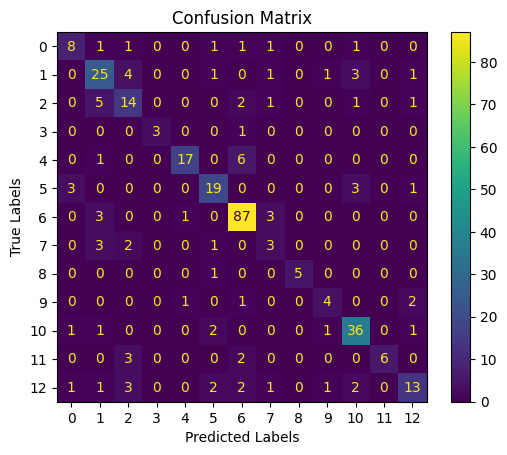

In [489]:
# show confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import seaborn as sns

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# # create a confusion matrix using crosstab
# cm2 = pd.crosstab(y_test, y_pred)
#print(cm2)

# create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)

# plot confusion matrix
disp.plot()
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# # plot the confusion matrix using seaborn
# sns.heatmap(cm2, annot=True, cmap='Blues')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()

# # both these plots are cursed mfs